Homework 3

Name: Venkata Meghana Achanta

USC ID: 2578990261

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle

In [ ]:
def data_split(x,y):
  xn_train = x[:,:-1]
  xn_label = x[:,-1]
  xn_test = y[:,:-1]
  yn_label = y[:,-1]
  return xn_train, xn_label, xn_test, yn_label

In [ ]:
def ref(x,y):
  z = np.zeros([y.shape[0],1])
  for i in range(y.shape[0]):
    if y[i] == 1:
      z[i] = 1
    else:
      z[i] = -1
  xn = np.column_stack((np.ones([x.shape[0],1],dtype=float),x))
  g = np.multiply(xn, z)
  return xn, g

In [ ]:
def crit(w,x):
  j = 0
  l = int(x.shape[0])
  for i in range(l):
    if (np.dot(w.T, x[i,:]) <= 0):
      j = (j - np.dot(w.T, x[i,:]))
  return j

In [ ]:
def predict(w,x):
  w_pred = np.zeros([int(x.shape[0]),1])
  for i in range(int(x.shape[0])):
    z = np.dot(w.T, x[i,:])
    if z < 0:
      w_pred[i] = 2
    else:
      w_pred[i] = 1

  return w_pred

In [ ]:
def error(x,y):
  count = 0
  for i in range(int(x.shape[0])):
    if x[i]!=y[i]:
      count = count + 1
  err = (count/int(x.shape[0]))*100
  return err

Q4a)i. Sequential Gradient Descent

In [ ]:
data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset1_test.csv", delimiter = ",", dtype = float))

In [ ]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)
print(xn.shape, g.shape)
#Shuffling the dataset
xn = shuffle(xn, random_state = 150)
g = shuffle(g, random_state = 150)
xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = 0.1*np.ones([3,1])
w_out = np.ones([3,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
for i in range(epochs):
  count = 0
  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0

    else:
      count = count + 1

    w_out[:,ind] = w.T

  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

(100, 3) (100, 3)
Linearly Separable
The optimal weights are: [ 1.1        -3.28495439  3.63821648]
The training classification error is: 0.0
The testing classification error is: 0.0


In [ ]:
print('The final value of the criterion function is:',(J_d[-1]))

The final value of the criterion function is: 118.77973841170846


Text(0.5, 1.0, 'Learning Curve')

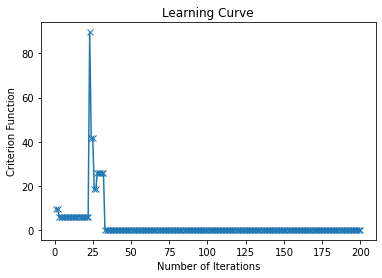

In [ ]:
plt.plot(axis, J_d[:len(axis)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

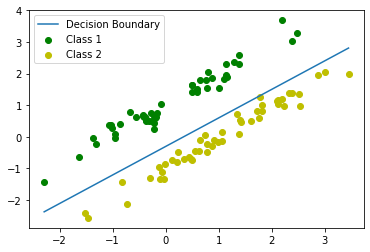

In [ ]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend()

Q4a)ii. Stochastic Gradient Descent-Variant 1

In [ ]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = 0.1*np.ones([3,1])
w_out = np.ones([3,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn,g,xn_label)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0

    else:
      count = count + 1

    w_out[:,ind] = w.T

  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

Linearly Separable
The optimal weights are: [ 0.1        -4.74413336  5.44791689]
The training classification error is: 0.0
The testing classification error is: 0.0


In [ ]:
print('The final value of the criterion function is:',(J_d[-1]))

The final value of the criterion function is: 118.77973841170844


Text(0.5, 1.0, 'Learning Curve')

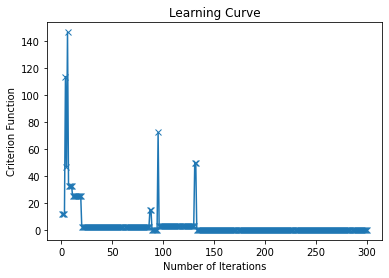

In [ ]:
plt.plot(axis, J_d[:len(axis)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

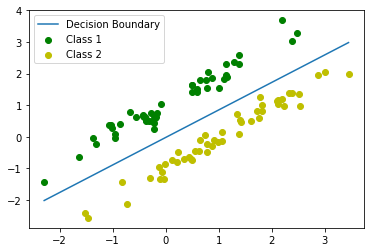

In [ ]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend()

In [ ]:
Q4b)i. Sequential Gradient Descent

In [ ]:
data_train = np.array(np.loadtxt("/content/dataset2_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset2_test.csv", delimiter = ",", dtype = float))

In [ ]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)
#Shuffling the dataset

xn = shuffle(xn, random_state = 150)
g = shuffle(g, random_state = 150)
xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = 0.1*np.ones([3,1])
w_out = np.ones([3,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
axis = []

for i in range(epochs):
  count = 0
  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0

    else:
      count = count + 1

    w_out[:,ind] = w.T

  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

Linearly Separable
The optimal weights are: [-0.9        -0.03912635  2.18701763]
The training classification error is: 0.0
The testing classification error is: 1.0


In [ ]:
print('The final value of the criterion function is:',(J_d[-1]))

The final value of the criterion function is: 102.59385636080181


Text(0.5, 1.0, 'Learning Curve')

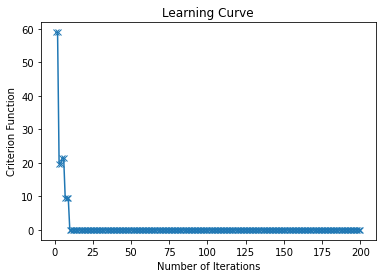

In [ ]:
plt.plot(axis, J_d[:len(axis)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

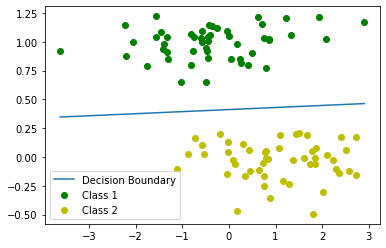

In [ ]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend()

Q4b)ii. Stochastic Gradient Descent- Variant 1

In [ ]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)
#Shuffling the dataset

# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = 0.1*np.ones([3,1])
w_out = np.ones([3,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
axis = []

for i in range(epochs):
  xn,g,xn_label = shuffle(xn,g,xn_label)
  count = 0
  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0

    else:
      count = count + 1

    w_out[:,ind] = w.T

  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

Linearly Separable
The optimal weights are: [-0.9        -0.06331729  2.06192659]
The training classification error is: 0.0
The testing classification error is: 0.0


In [ ]:
print('The final value of the criterion function is:',(J_d[-1]))

The final value of the criterion function is: 102.59385636080181


Text(0.5, 1.0, 'Learning Curve')

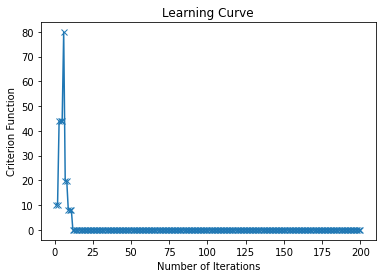

In [ ]:
plt.plot(axis, J_d[:len(axis)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

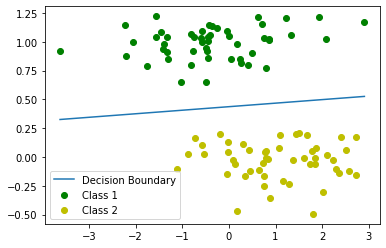

In [ ]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend()

Q4c)i. Sequential Gradient Descent

In [ ]:
data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))

In [ ]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

#Shuffling the dataset
xn = shuffle(xn, random_state = 150)
g = shuffle(g, random_state = 150)
xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = 0.1*np.ones([3,1])
w_out = np.ones([3,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
axis_epoch = []

for i in range(epochs):
  count = 0
  axis_epoch.append(i + 1)
  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0

    else:
      count = count + 1

    w_out[:,ind] = w.T

  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

The optimal weights are: [ 0.1        -0.05843529 -0.14301252]
The classification error is: 24.0
The testing classification error is: 25.0


In [ ]:
print('The final value of the criterion function is:',(J_d[-1]))

The final value of the criterion function is: 58.84730614193849


Text(0.5, 1.0, 'Learning Curve')

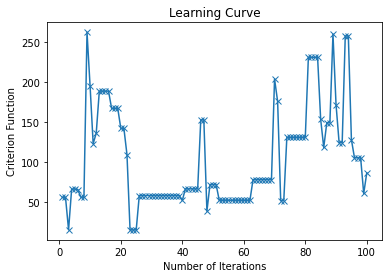

In [ ]:
plt.plot(axis_epoch, J_d[:len(axis_epoch)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

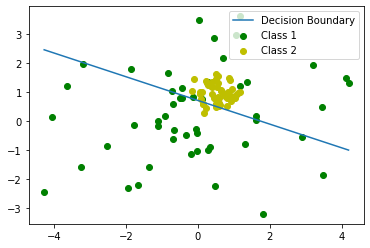

In [ ]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend()

Q4c)ii. Stochastic Gradient Descent- Variant 1

In [ ]:
data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))

In [ ]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

#Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = 0.1*np.ones([3,1])
w_out = np.ones([3,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
axis_epoch = []

for i in range(epochs):
  xn,g,xn_label = shuffle(xn,g,xn_label)
  count = 0
  axis_epoch.append(i + 1)
  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0

    else:
      count = count + 1

    w_out[:,ind] = w.T

  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

The optimal weights are: [ 0.1        -0.04660319 -0.15235231]
The classification error is: 25.0
The testing classification error is: 25.0


In [ ]:
print('The final value of the criterion function is:',(J_d[-1]))

The final value of the criterion function is: 184.02605600301624


Text(0.5, 1.0, 'Learning Curve')

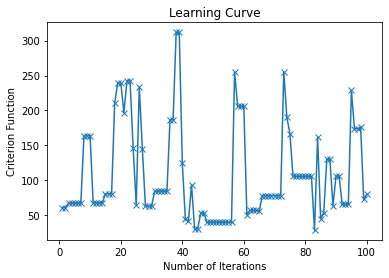

In [ ]:
plt.plot(axis_epoch, J_d[:len(axis_epoch)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

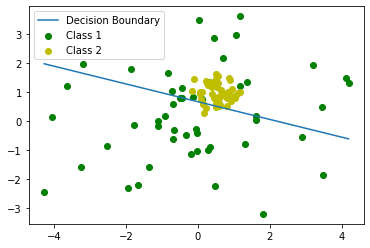

In [ ]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend()

Q4d)i. Sequential Gradient Descent

In [ ]:
data_train = np.load('/content/breast_cancer_train.npy')
data_test = np.load('/content/breast_cancer_test.npy')

xn_train, xn_label, xn_test, y_label = data_split(data_train,data_test)
xn_norm = np.linalg.norm(xn_train, ord = 1, axis = 0)
xn_train = 100*xn_train/xn_norm
xn,g = ref(xn_train, xn_label)
xn_test = 100*xn_test/xn_norm
xn,g,xn_label = shuffle(xn,g,xn_label, random_state = 150)
#Initializing the weights
w = 0.1*np.ones([31,1])
w_out = np.ones([31,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
d = []
ind = 0
axis_epoch = []
for i in range(epochs + 1):
  axis_epoch.append(i + 1)
  count = 0
  for j in range(l):
    ind = ind + 1
    d.append(ind)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([31,1])
      count = 0

    else:
      count = count + 1

    if ind < 10000:
      w_out[:, ind] = w.T

  if ind == 10000:
      break
  if count == 480:
      print("Linearly Separable")
      break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

print('The final value of the criterion function is:',(J_d[-1]))

plt.plot(axis_epoch, J_d[:len(axis_epoch)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

val = []
for i in range(l):
    value = np.dot(w_opt.T, xn[i, :])/np.linalg.norm(w_opt)
    val.append([value])

val = np.array([val]).reshape(480,1)
class1 = val[xn_label==1]
class2 = val[xn_label==2]
plt.hist(val, label='Training Data', edgecolor='blue')
plt.hist(class1, label='Class 1', edgecolor='blue')
plt.hist(class2, label='Class 2', edgecolor='blue')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()


Q4d)ii. Stochastic Gradient Descent- Variant 1

In [ ]:
data_train = np.load('/content/breast_cancer_train.npy')
data_test = np.load('/content/breast_cancer_test.npy')

xn_train, xn_label, xn_test, y_label = data_split(data_train,data_test)
xn_norm = np.linalg.norm(xn_train, ord = 1, axis = 0)
xn_train = 100*xn_train/xn_norm
xn,g = ref(xn_train, xn_label)
xn_test = 100*xn_test/xn_norm

#Initializing the weights
w = 0.1*np.ones([31,1])
w_out = np.ones([31,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
d = []
ind = 0
axis_epoch = []

for i in range(epochs + 1):
  xn,g,xn_label = shuffle(xn,g,xn_label)
  count = 0
  axis_epoch.append(i + 1)
  for j in range(l):
    ind = ind + 1
    d.append(ind)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([31,1])
      count = 0

    else:
      count = count + 1

    if ind < 10000:
      w_out[:, ind] = w.T

  if ind == 10000:
      break
  if count == 480:
      print("Linearly Separable")
      break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

print('The final value of the criterion function is:',(J_d[-1]))

plt.plot(axis_epoch, J_d[:len(axis_epoch)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

val = []
for i in range(l):
    value = np.dot(w_opt.T, xn[i, :])/np.linalg.norm(w_opt)
    val.append([value])

val = np.array([val]).reshape(480,1)
class1 = val[xn_label==1]
class2 = val[xn_label==2]
plt.hist(val, label='Training Data', edgecolor='blue')
plt.hist(class1, label='Class 1', edgecolor='blue')
plt.hist(class2, label='Class 2', edgecolor='blue')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()



Q5.b)

In [ ]:
#Q5b)

z =  np.linspace(start = -2, stop = 2, num = 41)

def relu(x):
  return (np.maximum(0,x))

r = relu(z)

def softplus(x):
  return (np.log((1 + np.exp(x+ 10**(-23)))))

x = softplus(z)

plt.plot(z, r)
plt.plot(z, x)
plt.grid()
plt.legend(['Relu','Soft'])
plt.xlabel('Input')
plt.ylabel('Activation Function output')
plt.title('Relu v/s Soft')

Q5c)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z + 10**(-23)))

def crit(w,x):
  s = 0
  l = int(x.shape[0])
  for i in range(l):
    z = np.dot(w.T, x[i,:])
    s = np.mean(np.log((1 + np.exp(-z+ 10**(-23)))))
  return s

xn_train, xn_label, xn_test, y_label = data_split(data_train,data_test)
xn_norm = np.linalg.norm(xn_train, ord = 1, axis = 0)
xn_train = 100*xn_train/xn_norm
xn,g = ref(xn_train, xn_label)
xn_test = 100*normalize(xn_test, axis = 0, norm = 'l1')
xn,g,xn_label = shuffle(xn,g,xn_label, random_state = 150)
#Initializing the weights
w = 0.1*np.ones([31,1])
w_out = np.ones([31,10000])

#Training
l = int(g.shape[0])
epochs = int(10000/l)
d = []
ind = 0
axis_epoch = []

for i in range(epochs + 1):

  count = 0
  axis_epoch.append(i + 1)
  for j in range(l):
    ind = ind + 1
    d.append(ind)
    z = np.dot(w.T, g[j,:])
    dw = -(sigmoid(z)) * g[j,:]

    w = w + 1*dw.reshape([31,1])

    if ind < 10000:
      w_out[:, ind] = w.T

  if ind == 10000:
      break
  # if count == 480:
  #     print("Linearly Separable")
  #     break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

print('The final value of the criterion function is:',(J_d[-1]))

plt.plot(axis_epoch, J_d[:len(axis_epoch)],marker = 'x')
plt.xlabel('Number of Iterations')
plt.ylabel('Criterion Function')
plt.title('Learning Curve')

val = []
for i in range(l):
    value = np.dot(w_opt.T, xn[i, :])/np.linalg.norm(w_opt)
    val.append([value])

val = np.array([val]).reshape(480,1)
class1 = val[xn_label==1]
class2 = val[xn_label==2]
plt.hist(val, label='Training Data', edgecolor='blue')
plt.hist(class1, label='Class 1', edgecolor='blue')
plt.hist(class2, label='Class 2', edgecolor='blue')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()

